In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

In [2]:
# Drop unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography', 'NumOfProducts', 'Gender'], inplace=True)


In [3]:
# Separate features and target variable
X = df.drop(columns=['Exited']).values
Y = df['Exited'].values


In [4]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=80)


In [5]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Train decision tree model
model = DecisionTreeClassifier(random_state=80)
model.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=80)

In [7]:
# Input for the new customer
CreditScore = int(input("Enter the New Customer's CreditScore: "))
Age = int(input("Enter the New Customer's Age: "))
Tenure = int(input("Enter the New Customer's Tenure: "))
Balance = int(input("Enter the New Customer's Balance: "))
HasCrCard = int(input("Enter the New Customer's HasCrCard: "))
IsActiveMember = int(input("Enter the New Customer's IsActiveMember: "))
EstimatedSalary = int(input("Enter the New EstimatedSalary: "))

Enter the New Customer's CreditScore: 600
Enter the New Customer's Age: 50
Enter the New Customer's Tenure: 4
Enter the New Customer's Balance: 44444
Enter the New Customer's HasCrCard: 1
Enter the New Customer's IsActiveMember: 0
Enter the New EstimatedSalary: 54654


In [8]:
# Create a DataFrame for the new customer
newCust = pd.DataFrame({
    'CreditScore': [CreditScore],
    'Age': [Age],
    'Tenure': [Tenure],
    'Balance': [Balance],
    'HasCrCard': [HasCrCard],
    'IsActiveMember': [IsActiveMember],
    'EstimatedSalary': [EstimatedSalary]
})

In [9]:
# Feature scaling for the new customer
newCust_scaled = sc.transform(newCust)


D:\SHASH\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [10]:
# Predict for the new customer
result = model.predict(newCust_scaled)
print(result)

if result == 1:
    print("Customer will Buy the Product")
elif result == 0:
    print("Customer Will Not Buy the Product")


[0]
Customer Will Not Buy the Product


In [11]:
# Model evaluation
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of the Model: {0}%".format(accuracy * 100))

Accuracy of the Model: 74.5%


In [12]:
# Visualize predictions
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

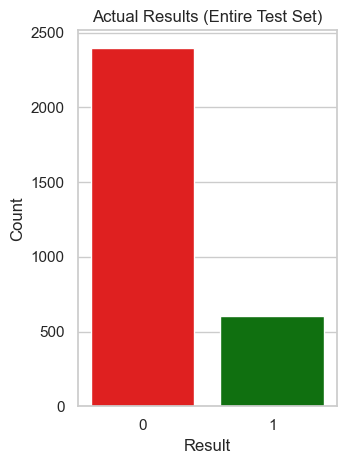

In [13]:
# Bar graph for "Buying" vs "Not Buying" on the entire test set
plt.subplot(1, 2, 2)
sns.countplot(x=Y_test, palette=["red", "green"])
plt.title("Actual Results (Entire Test Set)")
plt.xlabel("Result")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import tkinter as tk
from tkinter import ttk

def predict_customer(model, sc, data):
    newCust = [data]
    result = model.predict(sc.transform(newCust))
    return result

def visualize_results(Y_test, Y_pred):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))

    # Bar graph for "Buying" vs "Not Buying" on the entire test set
    plt.subplot(1, 2, 2)
    sns.countplot(x=Y_test, palette=["red", "green"])
    plt.title("Actual Results (Entire Test Set)")
    plt.xlabel("Result")
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

def on_predict_button_click():
    # Get values from the entry widgets
    credit_score = int(entry_credit_score.get())
    age = int(entry_age.get())
    tenure = int(entry_tenure.get())
    balance = int(entry_balance.get())
    has_cr_card = int(entry_has_cr_card.get())
    is_active_member = int(entry_is_active_member.get())
    estimated_salary = int(entry_estimated_salary.get())

    # Make prediction
    result = predict_customer(model, sc, [credit_score, age, tenure, balance, has_cr_card, is_active_member, estimated_salary])
    
    # Update the result label
    result_label.config(text=f"Predicted result: {'Buying' if result == 1 else 'Not Buying'}")

# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# Drop unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography', 'NumOfProducts', 'Gender'], inplace=True)

# Separate features and target variable
X = df.drop(columns=['Exited']).values
Y = df['Exited'].values

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=80)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train decision tree model
model = DecisionTreeClassifier(random_state=80)
model.fit(X_train, Y_train)

# Create the main window
root = tk.Tk()
root.title("Customer Purchase Prediction")

# Create labels and entry widgets
label_credit_score = ttk.Label(root, text="Credit Score:")
label_age = ttk.Label(root, text="Age:")
label_tenure = ttk.Label(root, text="Tenure:")
label_balance = ttk.Label(root, text="Balance:")
label_has_cr_card = ttk.Label(root, text="Has Credit Card (1 for Yes, 0 for No):")
label_is_active_member = ttk.Label(root, text="Is Active Member (1 for Yes, 0 for No):")
label_estimated_salary = ttk.Label(root, text="Estimated Salary:")

entry_credit_score = ttk.Entry(root)
entry_age = ttk.Entry(root)
entry_tenure = ttk.Entry(root)
entry_balance = ttk.Entry(root)
entry_has_cr_card = ttk.Entry(root)
entry_is_active_member = ttk.Entry(root)
entry_estimated_salary = ttk.Entry(root)

result_label = ttk.Label(root, text="Predicted result: ")

# Create the Predict button
predict_button = ttk.Button(root, text="Predict", command=on_predict_button_click)

# Grid layout
label_credit_score.grid(row=0, column=0, padx=5, pady=5, sticky=tk.W)
entry_credit_score.grid(row=0, column=1, padx=5, pady=5)
label_age.grid(row=1, column=0, padx=5, pady=5, sticky=tk.W)
entry_age.grid(row=1, column=1, padx=5, pady=5)
label_tenure.grid(row=2, column=0, padx=5, pady=5, sticky=tk.W)
entry_tenure.grid(row=2, column=1, padx=5, pady=5)
label_balance.grid(row=3, column=0, padx=5, pady=5, sticky=tk.W)
entry_balance.grid(row=3, column=1, padx=5, pady=5)
label_has_cr_card.grid(row=4, column=0, padx=5, pady=5, sticky=tk.W)
entry_has_cr_card.grid(row=4, column=1, padx=5, pady=5)
label_is_active_member.grid(row=5, column=0, padx=5, pady=5, sticky=tk.W)
entry_is_active_member.grid(row=5, column=1, padx=5, pady=5)
label_estimated_salary.grid(row=6, column=0, padx=5, pady=5, sticky=tk.W)
entry_estimated_salary.grid(row=6, column=1, padx=5, pady=5)

predict_button.grid(row=7, column=0, columnspan=2, pady=10)
result_label.grid(row=8, column=0, columnspan=2, pady=5)

# Start the main loop
root.mainloop()


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

def predict_on_dataset(model, sc, input_df):
    # Make predictions on the entire dataset
    predictions = model.predict(sc.transform(input_df.values))
    
    # Filter out customers who will not buy
    not_buying_customers = input_df[predictions == 0]
    
    return not_buying_customers

# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# Drop unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography', 'NumOfProducts', 'Gender'], inplace=True)

# Separate features and target variable
X = df.drop(columns=['Exited']).values
Y = df['Exited'].values

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=80)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train decision tree model
model = DecisionTreeClassifier(random_state=80)
model.fit(X_train, Y_train)

# Load the input dataset from a file (modify the file path accordingly)
input_df = pd.read_csv('synthetic_dataset.csv')
input_df.info()


# Use the predict_on_dataset function to get customers who will not buy
not_buying_customers_df = predict_on_dataset(model, sc, input_df)

# Display the DataFrame or save it as needed
print("Customers in the input dataset who will not buy the product:")
print(not_buying_customers_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Tenure           1000 non-null   int64  
 3   Balance          1000 non-null   float64
 4   HasCrCard        1000 non-null   int64  
 5   IsActiveMember   1000 non-null   int64  
 6   EstimatedSalary  1000 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 54.8 KB
Customers in the input dataset who will not buy the product:
     CreditScore  Age  Tenure       Balance  HasCrCard  IsActiveMember  \
0            402   48      10  75117.804781          1               0   
1            735   23       5   7100.766453          1               1   
2            570   44       4   8018.001408          0               1   
3            406   57       2  35477.129184          0               0   

In [16]:
not_buying_customers_df.describe()
not_buying_customers_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 666 entries, 0 to 998
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      666 non-null    int64  
 1   Age              666 non-null    int64  
 2   Tenure           666 non-null    int64  
 3   Balance          666 non-null    float64
 4   HasCrCard        666 non-null    int64  
 5   IsActiveMember   666 non-null    int64  
 6   EstimatedSalary  666 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 41.6 KB
